<a href="https://colab.research.google.com/github/shaarminey/Predictive-anaysis-using-breast-cancer-data/blob/main/Predictive_analysis_on_th_Wisconsin_breast_cancer_diagnostic_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The dataset**

The Breast Cancer (Wisconsin) Diagnosis dataset contains the diagnosis and a set of 30 features describing the characteristics of the cell nuclei present in the digitized image of a of a fine needle aspirate (FNA) of a breast mass.





**Objective**
To predict the cancer is malignant or benign

**Attribute information**


1.   Id number
2.   Diagnosis (M = malignant, B = benign)
3.   3-32.Ten real-valued features are computed for each cell nucleus:


*   a) radius (mean of distances from center to points on the perimeter)
*   b) texture (standard deviation of gray-scale values)
*   perimeter
*   area
*   smoothness (local variation in radius lengths)
*   compactness (perimeter^2 / area - 1.0)
*   concavity (severity of concave portions of the contour)
*   concave points (number of concave portions of the contour)
*   symmetry
*   fractal dimension ("coastline approximation" - 1)













Load libraries

In [96]:
!pip install mpld3

In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold  #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

Load dataset

In [98]:
df = pd.read_csv("data.csv",header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [99]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
# size of the dataframe
len(df)

569

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [101]:
df.shape

(569, 31)

In [102]:
def num_missing(x):
   return sum(x.isnull())

print ("Missing value per column:")
print (df.apply(num_missing, axis=0))
   

Missing value per column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [103]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The dataset contains 569 rows and 33 columns.The dataset contains both numeric and categorical columns. Our objective is to create a model to predict the value in the column 'diagnosis'.

In [104]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [105]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


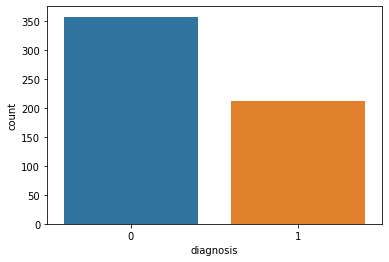

In [106]:
sns.countplot(df['diagnosis'], label='count')

In [107]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


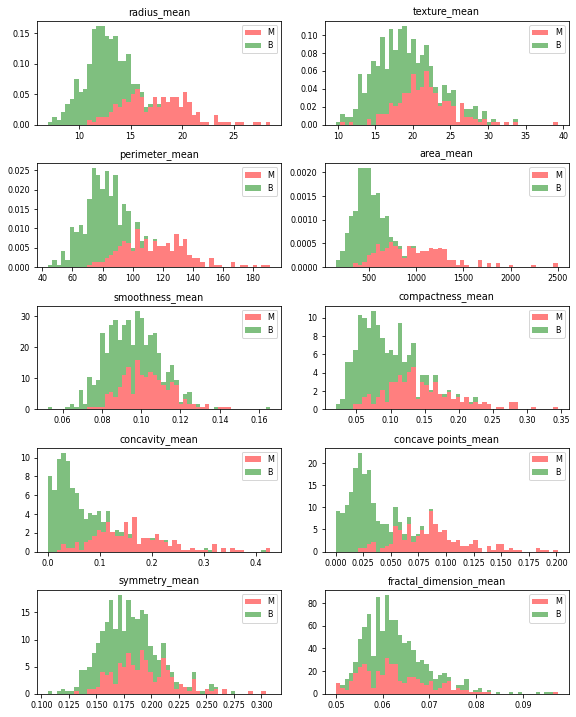

In [108]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

**Observations**
 

1.  The mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer to be malignant or benign. Larger values of these parameters tends to show a correlation with malignant tumors
2.   Next the mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. 
3. In any of the histograms there are no noticeable large outliers that warrants further cleanup.



# Feature distribution

The feature distribution helps in understanding what kind of feature we are dealing with, and what values we can expect this feature to have. 

radius distribution


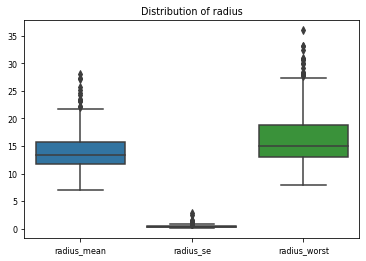

texture distribution


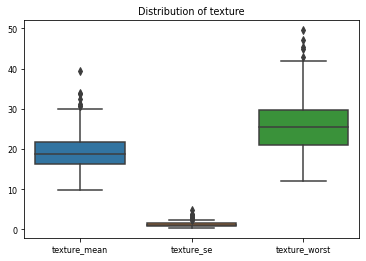

perimeter distribution


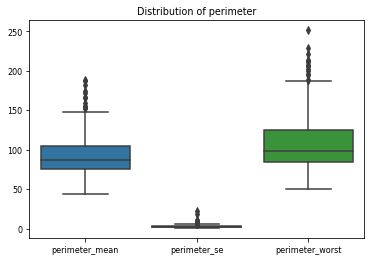

area distribution


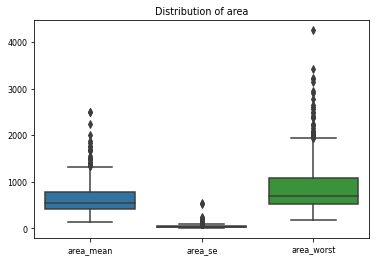

smoothness distribution


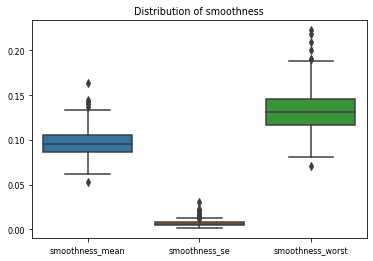

compactness distribution


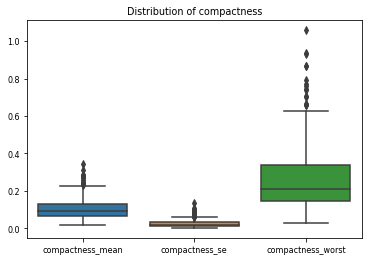

concavity distribution


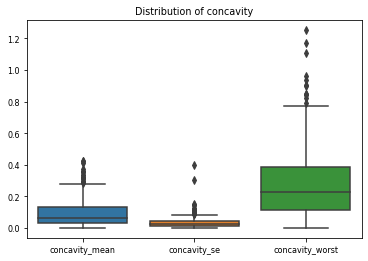

concave points distribution


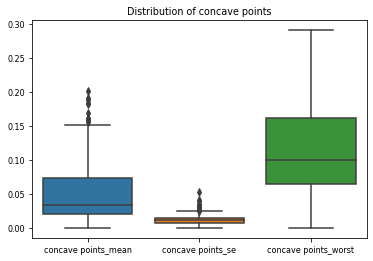

symmetry distribution


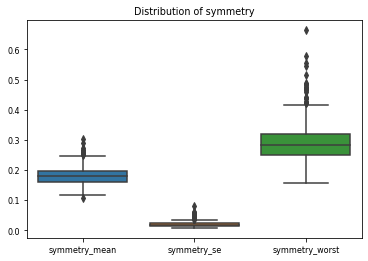

fractal_dimension distribution


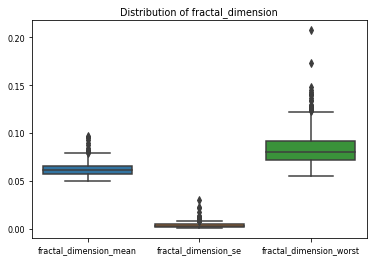

In [109]:
features = ['radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal_dimension']
 
for feature in features:
    print("{} distribution".format(feature))
    sns.boxplot(data=df[['{}_mean'.format(feature), '{}_se'.format(feature), '{}_worst'.format(feature)]])
    plt.title('Distribution of {}'.format(feature))
    plt.show()

In [110]:
#get the correlation of the columns
df.iloc[:,1:12].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111


# Correlation of variables

Correlation of varriables can give alot insights about the data and the variables that going to be tested. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated

Pairplot


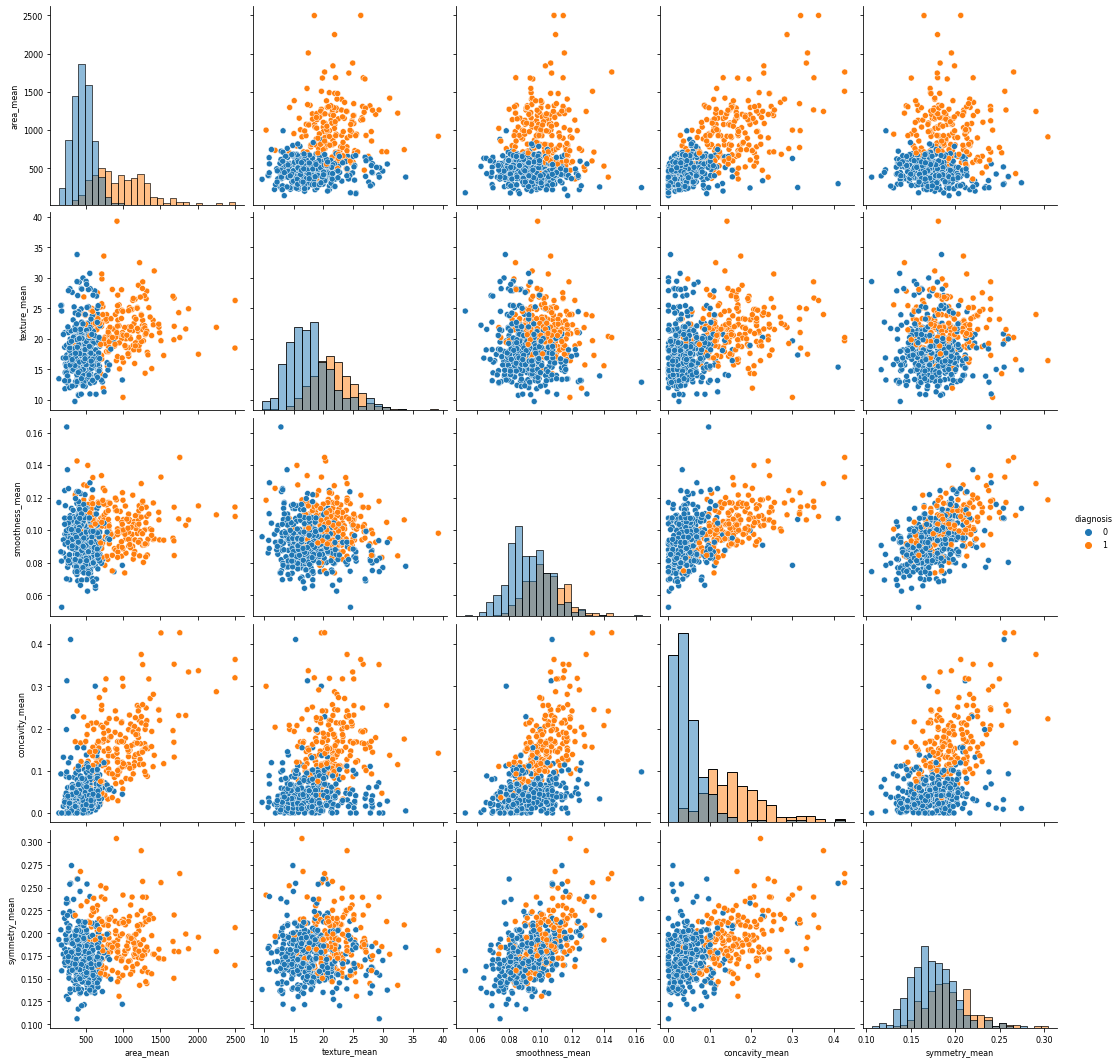

In [111]:
print('Pairplot')
sns.pairplot(data=df[['diagnosis','area_mean','texture_mean','smoothness_mean','concavity_mean','symmetry_mean']], hue="diagnosis", height=3, diag_kind="hist")
plt.show()

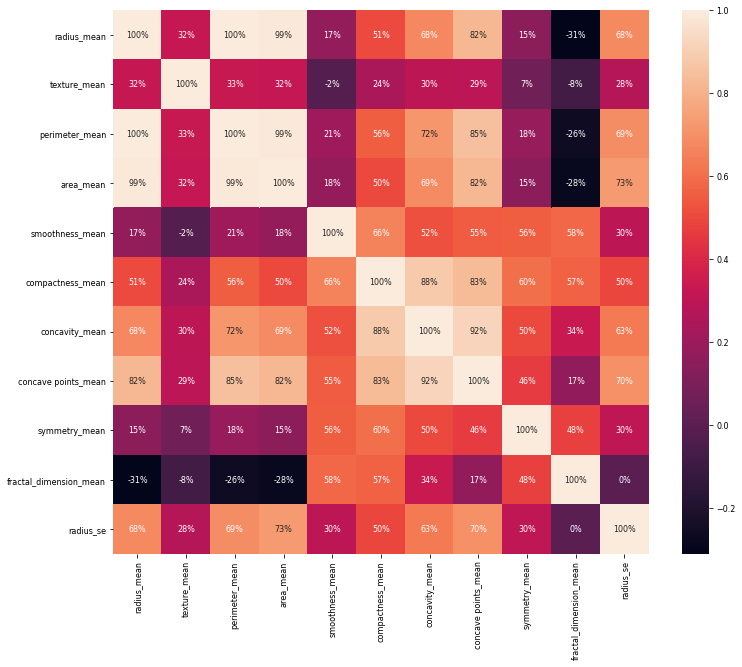

In [112]:
#Visualize the correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%')

# **Creating model for prediction**

Preprocessing dataset for model building

In [113]:
# Getting Features

x = df.drop(columns = 'diagnosis')

# Getting Predicting Value
y = df['diagnosis']

In [114]:
#split the dataset into 75% training and 25% testing
#train_test_splitting of the dataset
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

**Logistic Regression** 




In [116]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",reg.score(x_train,y_train)*100)


              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[63  4]
 [ 2 45]]
Training Score:  95.16483516483515


In [118]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
512,1,1
457,0,0
439,0,0
298,0,0
37,0,0
...,...,...
213,1,1
519,0,0
432,1,1
516,1,1


In [119]:
print(accuracy_score(y_test,y_pred)*100)

94.73684210526315


**KNeighbours classifier**


In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [121]:
y_pred=knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",knn.score(x_train,y_train)*100)
print(knn.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[64  3]
 [ 3 44]]
Training Score:  93.4065934065934
0.9473684210526315


In [122]:
print(accuracy_score(y_test,y_pred)*100)

94.73684210526315


**Naive Bayes Classifier**

In [123]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [124]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print("Training Score: ",gnb.score(x_train,y_train)*100)
print(gnb.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.91      0.91      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

[[63  4]
 [ 4 43]]
0.9298245614035088
Training Score:  94.72527472527472
0.9298245614035088


In [125]:
print(accuracy_score(y_test,y_pred))

0.9298245614035088


**SVM**

In [126]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [127]:
y_pred=svc.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",svc.score(x_train,y_train)*100)
print(svc.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

[[66  1]
 [ 7 40]]
Training Score:  90.98901098901099
0.9298245614035088


In [128]:
print(accuracy_score(y_test,y_pred))

0.9298245614035088


**Decision Tree Classifier**

In [129]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123)

dtree.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [130]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",dtree.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[63  4]
 [ 2 45]]
Training Score:  99.34065934065934


In [131]:
print(accuracy_score(y_test,y_pred)*100)

94.73684210526315


**Random Forest**

In [132]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",rfc.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[65  2]
 [ 1 46]]
Training Score:  100.0


In [134]:
print(accuracy_score(y_test,y_pred)*100)

97.36842105263158


In [135]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
512,1,1
457,0,0
439,0,0
298,0,0
37,0,0
...,...,...
213,1,1
519,0,0
432,1,1
516,1,1


**XG Boost classifier**

In [136]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

[09:00:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [137]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",xgb.score(x_train,y_train)*100)
print(xgb.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

[[64  3]
 [ 4 43]]
Training Score:  99.34065934065934
0.9385964912280702


In [138]:
print(accuracy_score(y_test,y_pred)*100)

93.85964912280701


**ADA Boost Classifier**

In [139]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [140]:
y_pred=adb.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",adb.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[65  2]
 [ 3 44]]
Training Score:  100.0


In [141]:
print(accuracy_score(y_test,y_pred)*100)

95.6140350877193


In [142]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
512,1,1
457,0,0
439,0,0
298,0,0
37,0,0
...,...,...
213,1,1
519,0,0
432,1,1
516,1,1


# **Conclusion**

The accuracy of different models as follows:

Logistic regression -94.7%

KNeighbours classfier - 94.7%

Decision tree - 94.7%

Random forest - 97.6%

Naive bayes - 94.7%

XG Boost classifier - 93.8%

ADA Boost classifier - 95.6%


# Looks like the Random Forest has the highest score among the other models
